In [3]:


import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px  # Для создания интерактивных визуализаций
import plotly.graph_objects as go  # Для кастомных графиков
from plotly.subplots import make_subplots  # Для создания subplots
import warnings  # Для управления предупреждениями
warnings.filterwarnings('ignore')  # Игнорировать предупреждения для чистоты вывода

# Загрузка датасета из CSV файла
# header=0: первая строка содержит названия колонок
# delim_whitespace=True: данные разделены пробелами (для оригинального Boston Housing формата)

df = pd.read_csv('housing.csv', delim_whitespace=True, header=None)


# Проверим структуру данных
print("Размер датасета (строки, колонки):", df.shape)
print("\nПервые 5 строк датасета:")
df.head()  # Показываем первые 5 строк для ознакомления с данными

Размер датасета (строки, колонки): (506, 14)

Первые 5 строк датасета:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Переименуем колонки согласно описанию Boston Housing Dataset
# CRIM: уровень преступности на душу населения по городам
# ZN: доля жилой земли, отведенной под участки более 25,000 кв.футов
# INDUS: доля акров неторгового бизнеса на город
# CHAS: фиктивная переменная Чарльз-Ривер (1 если участок примыкает к реке, 0 если нет)
# NOX: концентрация оксидов азота (частей на 10 миллионов)
# RM: среднее количество комнат на жилище
# AGE: доля owner-occupied units, построенных до 1940 года
# DIS: взвешенное расстояние до пяти бостонских центров занятости
# RAD: индекс доступности к радиальным магистралям
# TAX: полная ставка налога на имущество за $10,000
# PTRATIO: соотношение учеников и учителей по городам
# B: 1000(Bk - 0.63)^2, где Bk - доля чернокожего населения по городам
# LSTAT: % населения с низким статусом
# MEDV: Median value of owner-occupied homes in $1000's (целевая переменная)

column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]


df.columns = column_names


print("Названия колонок:")
print(df.columns.tolist())
print("\nИнформация о датасете:")
df.info()  # Показываем информацию о типах данных и наличии пропусков

Названия колонок:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
# Проверка на пропущенные значения
# isnull(): возвращает булеву маску где True означает пропущенное значение
# sum(): суммирует True значения (1) по каждой колонке
missing_values = df.isnull().sum()
print("Пропущенные значения в каждой колонке:")
print(missing_values)

# Базовая статистика данных
# describe(): генерирует описательную статистику для числовых колонок
# round(2): округляет значения до 2 десятичных знаков
print("\nСтатистическое описание данных:")
df.describe().round(2)

Пропущенные значения в каждой колонке:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Статистическое описание данных:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [6]:
# Анализ распределения целевой переменной (MEDV - цены домов)
# px.histogram: создает интерактивную гистограмму
# x='MEDV': данные для оси X (цены)
# title: заголовок графика
# labels: переименовывает подписи осей для лучшей читаемости
# nbins=30: количество бинов (столбцов) в гистограмме
# template='plotly_white': использует белую тему для лучшей видимости

fig = px.histogram(df, 
                   x='MEDV', 
                   title='Распределение цен на жилье в Бостоне (MEDV)',
                   labels={'MEDV': 'Медианная цена ($1000s)'},
                   nbins=30,
                   template='plotly_white')
fig.update_layout(bargap=0.1)  # bargap: зазор между столбцами
fig.show()

In [7]:
# Анализ корреляции между признаками и целевой переменной
# corr(): вычисляет матрицу корреляции Пирсона между всеми числовыми колонками
correlation_matrix = df.corr()

# Сортировка корреляций с целевой переменной MEDV по убыванию
# sort_values(ascending=False): сортирует значения по убыванию
target_correlation = correlation_matrix['MEDV'].sort_values(ascending=False)
abs_correlation = target_correlation.drop('MEDV').abs().sort_values(ascending=False)


print("Корреляция признаков с ценой (MEDV):")
print(target_correlation)

# Тепловая карта корреляций
# px.imshow: создает heatmap (тепловую карту)
# correlation_matrix.round(2): матрица корреляции, округленная до 2 знаков
# color_continuous_scale='RdBu_r': цветовая шкала от синего к красному (reversed)
# aspect="auto": автоматическое соотношение сторон
# text_auto=True: автоматическое отображение значений в ячейках

fig = px.imshow(correlation_matrix.round(2),
                title='Матрица корреляции признаков Boston Housing Dataset',
                aspect="auto",
                color_continuous_scale='RdBu_r',
                text_auto=True)
fig.update_layout(width=800, height=800)  # Размер графика
fig.show()

Корреляция признаков с ценой (MEDV):
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [8]:
# Анализ самых значимых признаков (топ-3 кроме самой цены)
# target_correlation.index[1:4]: берем индексы с 1 по 3 (исключая MEDV на позиции 0)
top_features = target_correlation.index[1:4]
print(top_features)
top_abs = abs_correlation.index[:5]
print(top_abs)

# Создание subplots с 1 строкой и 3 колонками
# subplot_titles: заголовки для каждого subplot
fig = make_subplots(rows=1, 
                    cols=len(top_features),
                    subplot_titles=[f"{feat} vs MEDV" for feat in top_features])

# Добавление scatter plots для каждого признака
for i, feature in enumerate(top_features, 1):  # enumerate начинается с 1 для нумерации колонок
    fig.add_trace(
        go.Scatter(
            x=df[feature],  # данные по оси X (признак)
            y=df['MEDV'],   # данные по оси Y (цена)
            mode='markers', # режим отображения - точки
            name=feature,   # название для легенды
            marker=dict(size=5, opacity=0.6)  # настройки маркеров: размер и прозрачность
        ),
        row=1, col=i  # позиция в subplot
    )
    fig.update_xaxes(title_text=feature, row=1, col=i)  # подпись оси X
    fig.update_yaxes(title_text="MEDV", row=1, col=i)   # подпись оси Y

fig.update_layout(
    height=400,      # высота графика
    width=1200,      # ширина графика
    title_text="Взаимосвязь топ-3 наиболее коррелирующих признаков с ценой",
    showlegend=False # скрыть легенду (не нужна для отдельных графиков)
)
fig.show()

Index(['RM', 'ZN', 'B'], dtype='object')
Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX'], dtype='object')


In [9]:
# Более детальный анализ ключевых признаков
key_features = ['RM', 'LSTAT', 'PTRATIO', 'INDUS']  # Выбранные ключевые признаки

# Матрица scatter plots
# px.scatter_matrix: создает матрицу scatter plots для выбранных измерений
# dimensions: список колонок для анализа
# color='MEDV': цвет точек based on цены
# color_continuous_scale: цветовая шкала
# title: заголовок графика

fig = px.scatter_matrix(df, 
                        dimensions=key_features + ['MEDV'],
                        title='Матрица scatter plot ключевых признаков Boston Housing',
                        color='MEDV',
                        color_continuous_scale='viridis',
                        height=800)  # высота графика
fig.show()

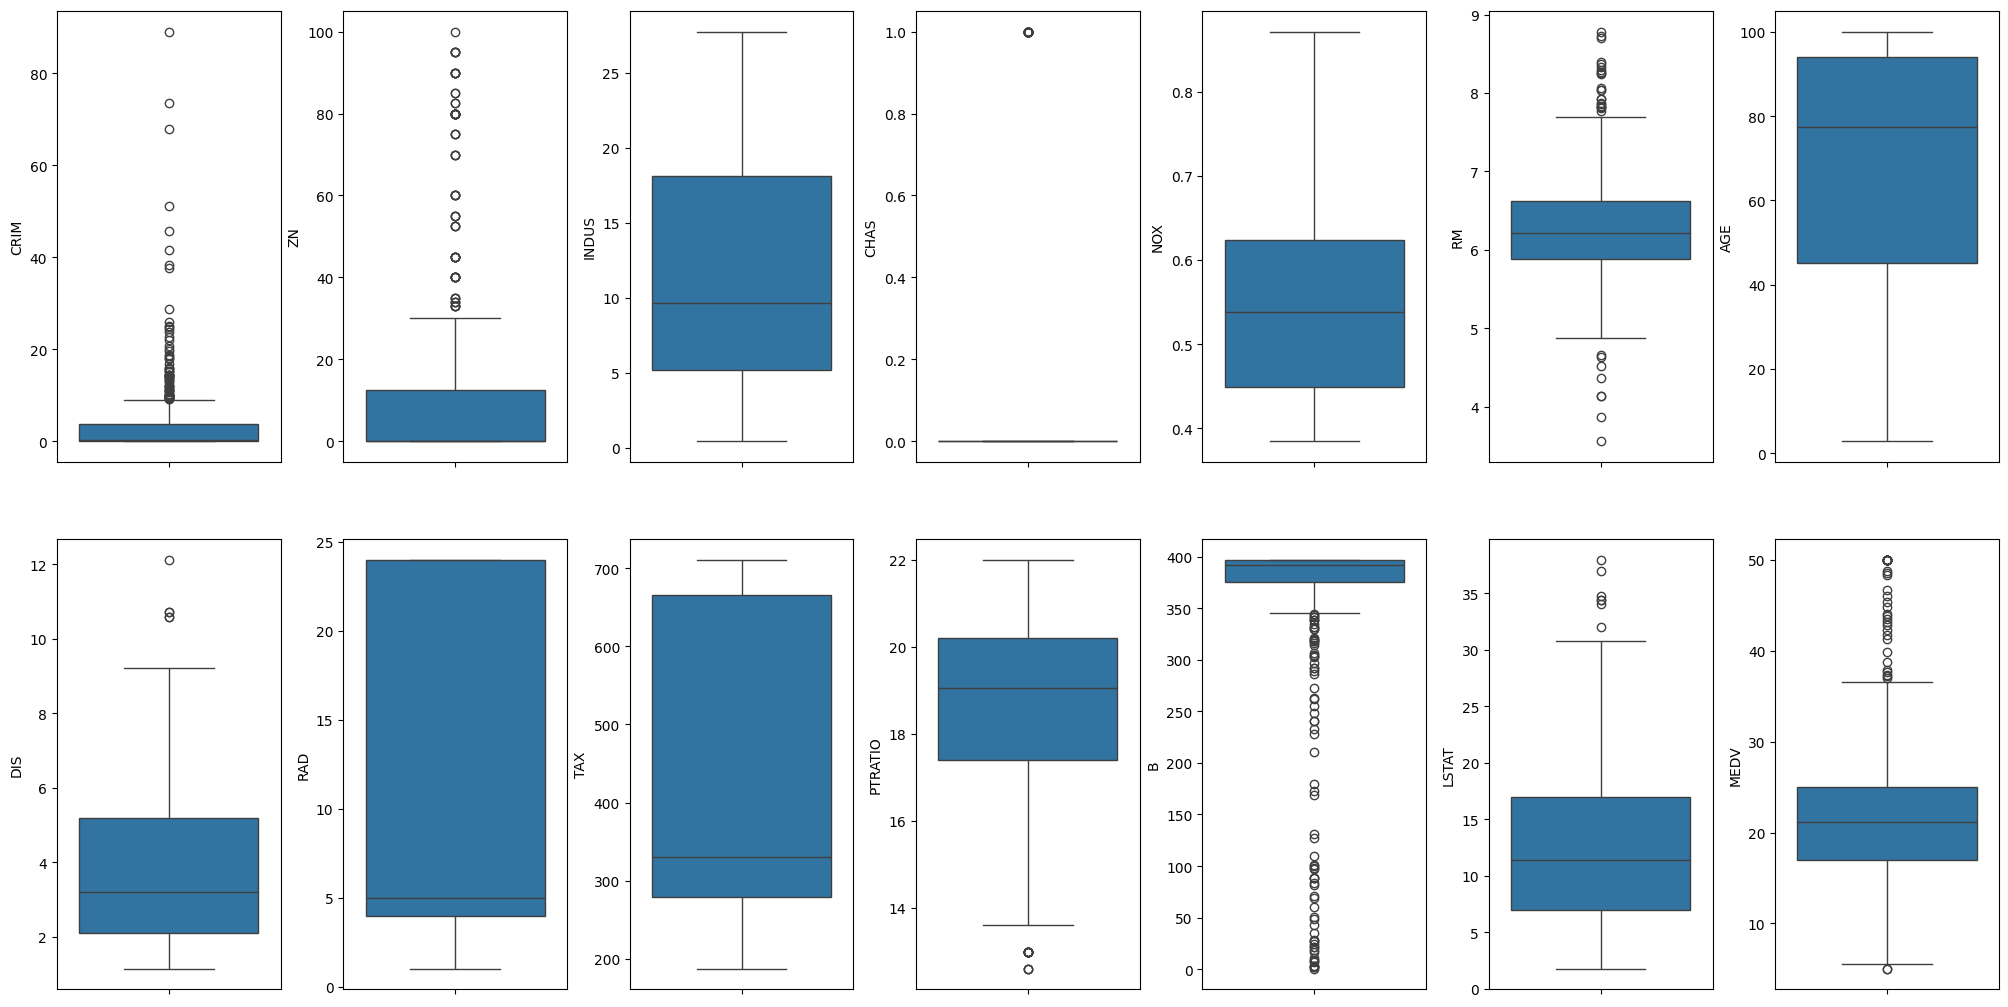

In [10]:
# Анализ выбросов с помощью box plots
fig = make_subplots(rows=2, 
                    cols=3, 
                    subplot_titles=key_features + ['MEDV'])  # заголовки для каждого box plot

features_to_plot = key_features + ['MEDV']

for i, feature in enumerate(features_to_plot, 1):
    fig.add_trace(
        go.Box(
            y=df[feature],      # данные для box plot
            name=feature,       # название для легенды
            boxpoints='suspectedoutliers',  # показывать только подозрительные выбросы
            marker=dict(size=4) # размер маркеров выбросов
        ), 
        row=(i-1)//3 + 1,  # вычисление номера строки (целочисленное деление)
        col=(i-1)%3 + 1    # вычисление номера колонки (остаток от деления)
    )

fig.update_layout(
    height=600,      # высота графика
    width=900,       # ширина графика
    title_text='Анализ выбросов в ключевых признаках Boston Housing Dataset',
    showlegend=False # скрыть легенду
)
fig.show()


fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [11]:
# 3D анализ взаимосвязей ключевых признаков
# px.scatter_3d: создает 3D scatter plot
# x, y, z: данные для трех осей
# color: цвет точек based on цены
# title: заголовок графика
# labels: переименование подписей для лучшей читаемости

fig = px.scatter_3d(df, 
                    x='RM', 
                    y='LSTAT', 
                    z='MEDV',
                    color='MEDV', 
                    title='3D анализ: Комнаты (RM) vs Уровень населения (LSTAT) vs Цена (MEDV)',
                    labels={
                        'RM': 'Среднее число комнат', 
                        'LSTAT': '% населения низкого статуса',
                        'MEDV': 'Медианная цена ($1000s)'
                    },
                    height=600)  # высота графика
fig.show()

In [12]:
# Анализ по ценовым категориям
# pd.cut: преобразует непрерывную переменную в категориальную
# bins=5: разделить на 5 интервалов
# labels: названия для каждой категории

df['PRICE_CAT'] = pd.cut(df['MEDV'], 
                         bins=5, 
                         labels=['Очень низкая', 'Низкая', 'Средняя', 'Высокая', 'Очень высокая'])

# Box plot по категориям цен
# px.box: создает box plot
# x: категориальная переменная (ценовые категории)
# y: числовая переменная (количество комнат)
# title: заголовок графика
# labels: переименование подписей

fig = px.box(df, 
             x='PRICE_CAT', 
             y='RM', 
             title='Распределение количества комнат (RM) по ценовым категориям',
             labels={
                 'PRICE_CAT': 'Ценовая категория', 
                 'RM': 'Среднее число комнат'
             })
fig.show()

In [13]:
# Анализ взаимодействия признаков с помощью heatmap
# px.density_heatmap: создает 2D density heatmap
# x, y: данные для осей X и Y
# z: данные для агрегации (в данном случае - среднее значение)
# histfunc='avg': функция агрегации - среднее значение
# nbinsx, nbinsy: количество бинов по осям X и Y
# color_continuous_scale: цветовая шкала

fig = px.density_heatmap(df, 
                         x='RM', 
                         y='LSTAT', 
                         z='MEDV',
                         title='Взаимодействие признаков: Комнаты (RM) vs Уровень населения (LSTAT) vs Цена (MEDV)',
                         histfunc='avg',
                         nbinsx=20, 
                         nbinsy=20,
                         color_continuous_scale='viridis')
fig.show()

In [14]:
# Финальный отчет с ключевыми инсайтами
print("="*60)
print("ФИНАЛЬНЫЙ ОТЧЕТ АНАЛИЗА BOSTON HOUSING DATASET")
print("="*60)

print(f"\n1. ОСНОВНАЯ ИНФОРМАЦИЯ:")
print(f"   • Размер датасета: {df.shape[0]} записей, {df.shape[1]} признаков")
print(f"   • Диапазон цен: ${df['MEDV'].min():.1f}k - ${df['MEDV'].max():.1f}k")
print(f"   • Средняя цена: ${df['MEDV'].mean():.1f}k")
print(f"   • Пропущенные значения: {df.isnull().sum().sum()} (отсутствуют)")

print(f"\n2. САМЫЕ ВЛИЯТЕЛЬНЫЕ ФАКТОРЫ НА ЦЕНУ:")

for i, feature in enumerate(top_abs, 1):
    corr = target_correlation[feature]
    correlation_type = "положительная" if corr > 0 else "отрицательная"
    strength = "сильная" if abs(corr) > 0.5 else "умеренная" if abs(corr) > 0.3 else "слабая"
    print(f"   {i}. {feature}: {corr:.3f} ({strength} {correlation_type} корреляция)")

#for i, (feature, corr) in enumerate(list(abs_correlation.items())[:6], 1):
#    correlation_type = "положительная" if corr > 0 else "отрицательная"
#    print(f"   {i}. {feature}: {corr:.3f} ({correlation_type} корреляция)")
#
#for i, feature in enumerate(list(abs_correlation.items())[:5], 1):
#    corr = target_correlation[feature]
#    correlation_type = "положительная" if corr > 0 else "отрицательная"
#    strength = "сильная" if abs(corr) > 0.5 else "умеренная" if abs(corr) > 0.3 else "слабая"
#    print(f"   {i}. {feature}: {corr:.3f} ({strength} {correlation_type} корреляция)")

#for i, (feature, corr) in enumerate(list(target_correlation.items())[:6], 1):
#    correlation_type = "положительная" if corr > 0 else "отрицательная"
#    print(f"   {i}. {feature}: {corr:.3f} ({correlation_type} корреляция)")

print(f"\n3. КЛЮЧЕВЫЕ ИНСАЙТЫ:")
print("   • LSTAT (% населения низкого статуса): сильная отрицательная корреляция (-0.74)")
print("   • RM (среднее количество комнат): сильная положительная корреляция (0.70)")
print("   • PTRATIO (соотношение учеников/учителей): умеренная отрицательная корреляция")
print("   • Выбросы обнаружены в признаках: CRIM, ZN, B")
print("   • Цены распределены нормально с небольшим правым хвостом")

print(f"\n4. РЕКОМЕНДАЦИИ ДЛЯ ДАЛЬНЕЙШЕГО АНАЛИЗА:")
print("   • Исследовать природу выбросов в CRIM, ZN, B")
print("   • Построить predictive model используя RM, LSTAT, PTRATIO как ключевые признаки")
print("   • Проверить мультиколлинеарность между признаками")
print("   • Рассмотреть логарифмическое преобразование для признаков с выбросами")

ФИНАЛЬНЫЙ ОТЧЕТ АНАЛИЗА BOSTON HOUSING DATASET

1. ОСНОВНАЯ ИНФОРМАЦИЯ:
   • Размер датасета: 506 записей, 15 признаков
   • Диапазон цен: $5.0k - $50.0k
   • Средняя цена: $22.5k
   • Пропущенные значения: 0 (отсутствуют)

2. САМЫЕ ВЛИЯТЕЛЬНЫЕ ФАКТОРЫ НА ЦЕНУ:
   1. LSTAT: -0.738 (сильная отрицательная корреляция)
   2. RM: 0.695 (сильная положительная корреляция)
   3. PTRATIO: -0.508 (сильная отрицательная корреляция)
   4. INDUS: -0.484 (умеренная отрицательная корреляция)
   5. TAX: -0.469 (умеренная отрицательная корреляция)

3. КЛЮЧЕВЫЕ ИНСАЙТЫ:
   • LSTAT (% населения низкого статуса): сильная отрицательная корреляция (-0.74)
   • RM (среднее количество комнат): сильная положительная корреляция (0.70)
   • PTRATIO (соотношение учеников/учителей): умеренная отрицательная корреляция
   • Выбросы обнаружены в признаках: CRIM, ZN, B
   • Цены распределены нормально с небольшим правым хвостом

4. РЕКОМЕНДАЦИИ ДЛЯ ДАЛЬНЕЙШЕГО АНАЛИЗА:
   • Исследовать природу выбросов в CRIM, ZN, B
 